<a href="https://colab.research.google.com/github/nabdeep-patel/Titanic-Data-Prediction/blob/main/titanic_data_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement:**
We have the data of person present in Titanic and based on the information we have to predict whether a person survived or not.

## Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Downloading the data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/Titanic-Data-Prediction/main/data/train.csv")

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
print(data.isnull().sum())
print("Shape of Data:",data.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
Shape of Data: (891, 12)


## Exploring the data (EDA - Exploratory Data Analysis)

EDA is a very important tool that helps us to visualise the every aspect of the data and help us in finding relation between them.

<Axes: >

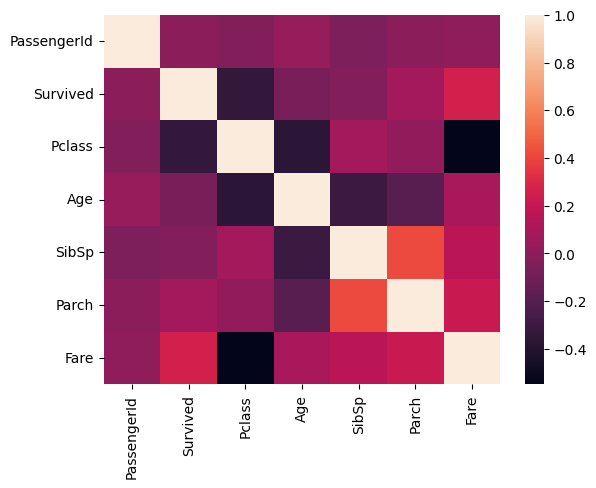

In [ ]:
numerical_data = data.select_dtypes(include=['number'])
sns.heatmap(numerical_data.corr())

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

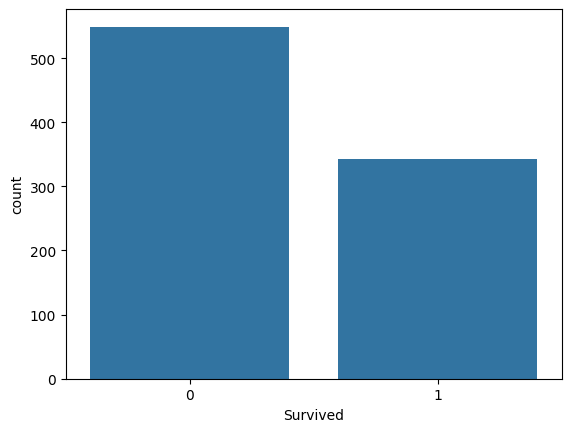

In [ ]:
#No of Survived Person
print(data["Survived"].value_counts())
sns.countplot(x='Survived',data = data)


<Axes: xlabel='Survived', ylabel='count'>

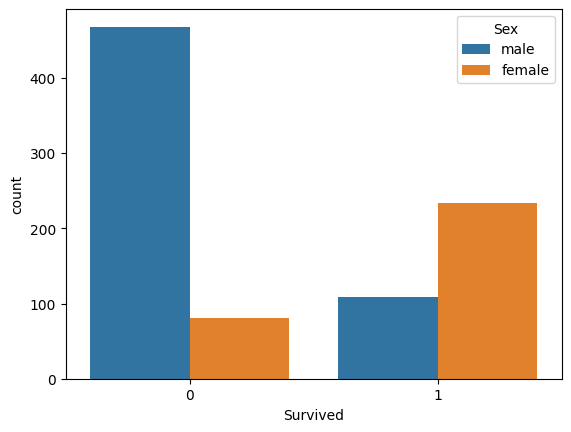

In [ ]:
# Survived v/s Age Plot
sns.countplot(x="Survived",hue="Sex",data =data)

<Axes: xlabel='Survived', ylabel='count'>

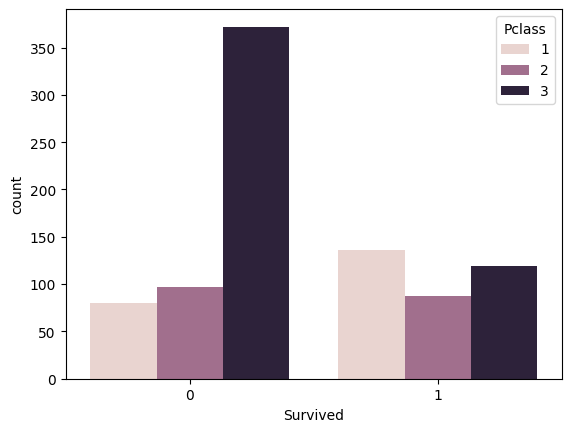

In [ ]:
sns.countplot(x="Survived",hue="Pclass",data=data)

<Axes: xlabel='Age', ylabel='Count'>

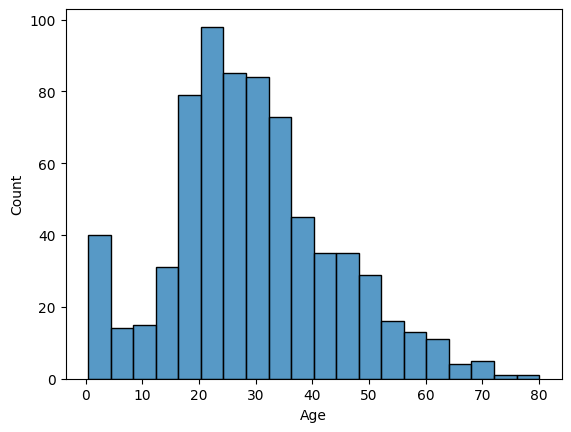

In [ ]:
sns.histplot(data['Age'].dropna())

<Axes: xlabel='SibSp', ylabel='count'>

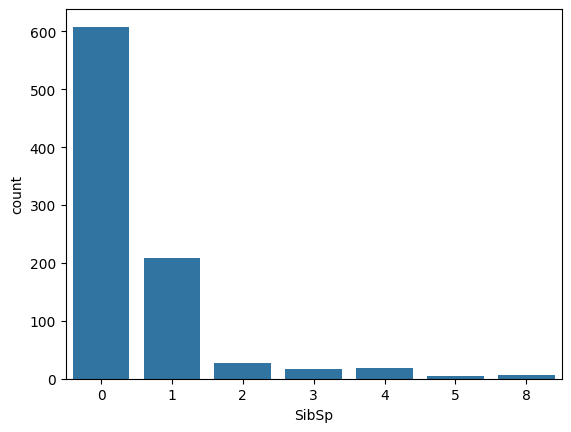

In [ ]:
sns.countplot(x="SibSp",data=data)

## Data Cleaning

Before using data we must ensure that it has no null values. If null values are present then we have to either remove that rows/columns or fill them with some value.

<Axes: xlabel='Pclass', ylabel='Age'>

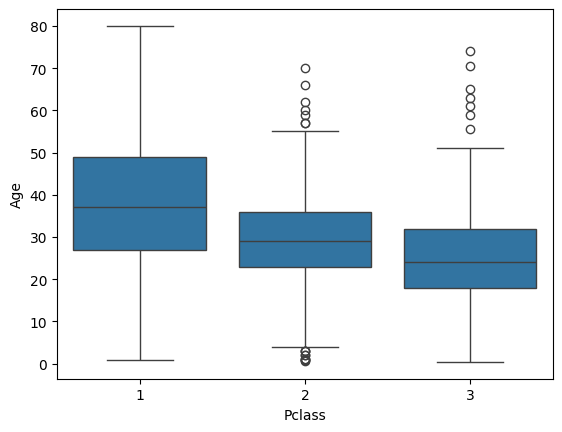

In [ ]:
sns.boxplot(x="Pclass",y="Age",data=data)

In [ ]:
def Agenew(cols):
    Age =cols[0]
    Pclass =cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 36
        elif Pclass==2:
            return 30
        else:
            return 24
    else:
        return Age

In [ ]:
data["Age"]=data[["Age","Pclass"]].apply(Agenew,axis=1)

<ipython-input-20-e2d76a519679>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age =cols[0]
<ipython-input-20-e2d76a519679>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass =cols[1]


In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.drop("Cabin",axis=1,inplace=True)
data.dropna(axis=0,inplace=True)

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


## Converting Text Columns into categorical data

Some columns present in the data have values which are not numbers and for prediction we need only interger values hence the column having values which are not integers are either need to be removed or converted to integers.

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [ ]:
sex = pd.get_dummies(data["Sex"],drop_first=True)
embark = pd.get_dummies(data["Embarked"],drop_first=True)

In [ ]:
data.drop(["Name","Sex","Embarked","Ticket"],axis=1,inplace=True)
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [ ]:
data1 = pd.concat([data,sex,embark],axis=1)
data1.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


## Using Logistic Regression Model to predict the data

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression(max_iter=1000)
model.fit(data1.drop("Survived",axis=1),data1["Survived"])

LogisticRegression(max_iter=1000)

## Checking it on the Test Data

First import the test data and the data with the Survived value for the test data, remove the null values and make sure the number of rows in the test data and the train data must be the same.

In [ ]:
test=pd.read_csv("https://raw.githubusercontent.com/nabdeep-patel/Titanic-Data-Prediction/main/data/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.shape

(418, 11)

In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
test["Age"]=test[["Age","Pclass"]].apply(Agenew,axis=1)
test.isnull().sum()

<ipython-input-20-e2d76a519679>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Age =cols[0]
<ipython-input-20-e2d76a519679>:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Pclass =cols[1]


,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
test.drop(["Cabin"],axis=1,inplace=True)
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,1
Embarked,0


In [ ]:
test=test.fillna(36)
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Embarked,0


In [ ]:
sex1 = pd.get_dummies(test["Sex"],drop_first=True)
embark1 = pd.get_dummies(test["Embarked"],drop_first=True)

In [ ]:
test.drop(["Name","Sex","Embarked","Ticket"],axis=1,inplace=True)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,892,3,34.5,0,0,7.8292
1,893,3,47.0,1,0,7.0000
2,894,2,62.0,0,0,9.6875
3,895,3,27.0,0,0,8.6625
4,896,3,22.0,1,1,12.2875


In [ ]:
test = pd.concat([test,sex1,embark1],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,True,True,False
1,893,3,47.0,1,0,7.0000,False,False,True
2,894,2,62.0,0,0,9.6875,True,True,False
3,895,3,27.0,0,0,8.6625,True,False,True
4,896,3,22.0,1,1,12.2875,False,False,True


In [ ]:
pred = model.predict(test)

In [ ]:
my_pred=np.array(pred)
my_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
check=pd.read_csv('https://raw.githubusercontent.com/nabdeep-patel/Titanic-Data-Prediction/main/data/gender_submission.csv')
check.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
check.isnull().sum()

,0
PassengerId,0
Survived,0


In [ ]:
accuracy = confusion_matrix(check["Survived"],pred)
accuracy

array([[248,  18],
       [ 10, 142]])

In [ ]:
acc = accuracy_score(check["Survived"],pred)
acc

0.9330143540669856

## Outcome/Result

In [ ]:
acc_per = accuracy_score(check["Survived"],pred)*100
print("Accuracy in percentage:",acc_per)

Accuracy in percentage: 93.30143540669856


By using the simplest logistic regression model we obtained an accurate prediction of 93%.

In [ ]:
output=pd.concat([check],axis=1)
output

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
output.drop("Survived",axis=1,inplace=True)
output

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
output["Survived"]=np.array(pred)

In [ ]:
output

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
output.set_index(output.columns[0], inplace=True)

In [ ]:
output

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0


In [ ]:
output.to_csv("prediction.csv",index="False")

In [ ]:
pd.read_csv("/content/prediction.csv")

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
